In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
import pandas as pd
import pickle
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import layers

tf.random.set_seed(997)
import warnings
warnings.filterwarnings('ignore')

In [2]:
pickle_path_list = [
    './df0.pickle', './X0.pickle', './X0_train.pickle', './X0_test.pickle',
    './y0.pickle', './y0_train.pickle', './y0_test.pickle', './df1.pickle',
    './X1.pickle', './X1_train.pickle', './X1_test.pickle', './y1.pickle',
    './y1_train.pickle', './y1_test.pickle', './df2.pickle', './X2.pickle',
    './X2_train.pickle', './X2_test.pickle', './y2.pickle',
    './y2_train.pickle', './y2_test.pickle'
]

pickle_string_list = []
for i in pickle_path_list:
    i = i.lstrip(i[:2])
    pickle_string_list.append(i)

variable_string_list = []
for i in pickle_path_list:
    i = i.rstrip(i[-7:])
    i = i.lstrip(i[:2])
    variable_string_list.append(i)

In [3]:
df0, X0, X0_train, X0_test, y0, y0_train, y0_test, df1, X1, X1_train, X1_test, y1, y1_train, y1_test, df2, X2, X2_train, X2_test, y2, y2_train, y2_test = pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame

variable_list = [
    df0, X0, X0_train, X0_test, y0, y0_train, y0_test, df1, X1, X1_train,
    X1_test, y1, y1_train, y1_test, df2, X2, X2_train, X2_test, y2, y2_train,
    y2_test
]

In [4]:
for i in range(len(pickle_path_list)):
    variable_list[i] = pd.read_pickle(pickle_path_list[i])

In [5]:
df0, X0, X0_train, X0_test, y0, y0_train, y0_test, df1, X1, X1_train, X1_test, y1, y1_train, y1_test, df2, X2, X2_train, X2_test, y2, y2_train, y2_test = variable_list[
    0], variable_list[1], variable_list[2], variable_list[3], variable_list[
        4], variable_list[5], variable_list[6], variable_list[
            7], variable_list[8], variable_list[9], variable_list[
                10], variable_list[11], variable_list[12], variable_list[
                    13], variable_list[14], variable_list[15], variable_list[
                        16], variable_list[17], variable_list[
                            18], variable_list[19], variable_list[20],

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [6]:
def create_model_regression(inNum, hNum, hAct, outNum, drop):
    """
    :param inNum: ilość cech wejściowych
    :param hNum: lista ilości neuronów w poszczególnych warstwach ukrytych
    :param hAct: rodzaj aktywacji w warstwach ukrytych, str
    :param outNum: ilość
    :param drop: siła dropout'u, procent zerowanych sygnałów w warstwie ukrytej
    """
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=(inNum)))
    for idx, oneHidNum in enumerate(hNum):
        # dodajemy warstwę
        model.add(layers.Dense(oneHidNum, activation=hAct))
        model.add(layers.Dropout(drop))
    # warstwa wyjściowa
    #model.add(layers.Dropout(drop))
    model.add(layers.Dense(outNum))

#     print(model.summary())

    opt = tf.keras.optimizers.Adam()
    model.compile(optimizer=opt,
                  loss=tf.keras.losses.MeanAbsolutePercentageError())

    return model

In [7]:
modelRegr0 = create_model_regression(X0_train.shape[1], [100,200,300,400,500], "relu", 1, 0.1)
history0 = modelRegr0.fit(X0_train, y0_train, batch_size=10, epochs=50, verbose=0)

In [8]:
modelRegr1 = create_model_regression(X1_train.shape[1], [100,200,300,400,500], "relu", 1, 0.1)
history1 = modelRegr1.fit(X1_train, y1_train, batch_size=10, epochs=50, verbose=0)

In [9]:
modelRegr2 = create_model_regression(X2_train.shape[1], [100,200,300,400,500], "relu", 1, 0.1)
history2 = modelRegr2.fit(X2_train, y2_train, batch_size=10, epochs=50, verbose=0)

In [10]:
y0_pred_test = modelRegr0.predict(X0_test)
y0_pred_train = modelRegr0.predict(X0_train)
print('Results for cluster 0')
print("MAPE on train :", round(100 * mean_absolute_percentage_error(y0_train, y0_pred_train), 3),"%")
print("MAPE on test  :", round(100 * mean_absolute_percentage_error(y0_test, y0_pred_test), 3),"%")
print("MSE on train  :", "{:.3e}".format(mean_squared_error(y0_train, y0_pred_train)))
print("MSE on test   :", "{:.3e}".format(mean_squared_error(y0_test, y0_pred_test))) 
print("R2 on train   :", round(r2_score(y0_train, y0_pred_train),3))
print("R2 on test    :", round(r2_score(y0_test, y0_pred_test),3))
y1_pred_test = modelRegr1.predict(X1_test)
y1_pred_train = modelRegr1.predict(X1_train)
print('\nResults for cluster 1')
print("MAPE on train :", round(100 * mean_absolute_percentage_error(y1_train, y1_pred_train), 3),"%")
print("MAPE on test  :", round(100 * mean_absolute_percentage_error(y1_test, y1_pred_test), 3),"%")
print("MSE on train  :", "{:.3e}".format(mean_squared_error(y1_train, y1_pred_train)))
print("MSE on test   :", "{:.3e}".format(mean_squared_error(y1_test, y1_pred_test))) 
print("R2 on train   :", round(r2_score(y1_train, y1_pred_train),3))
print("R2 on test    :", round(r2_score(y1_test, y1_pred_test),3))
y2_pred_test = modelRegr2.predict(X2_test)
y2_pred_train = modelRegr2.predict(X2_train)
print('\nResults for cluster 2')
print("MAPE on train :", round(100 * mean_absolute_percentage_error(y2_train, y2_pred_train), 3),"%")
print("MAPE on test  :", round(100 * mean_absolute_percentage_error(y2_test, y2_pred_test), 3),"%")
print("MSE on train  :", "{:.3e}".format(mean_squared_error(y2_train, y2_pred_train)))
print("MSE on test   :", "{:.3e}".format(mean_squared_error(y2_test, y2_pred_test))) 
print("R2 on train   :", round(r2_score(y2_train, y2_pred_train),3))
print("R2 on test    :", round(r2_score(y2_test, y2_pred_test),3))

Results for cluster 0
MAPE on train : 5.6 %
MAPE on test  : 7.43 %
MSE on train  : 7.949e+11
MSE on test   : 8.192e+11
R2 on train   : -0.237
R2 on test    : -0.325

Results for cluster 1
MAPE on train : 7.908 %
MAPE on test  : 11.272 %
MSE on train  : 4.020e+12
MSE on test   : 4.728e+12
R2 on train   : -0.088
R2 on test    : -0.208

Results for cluster 2
MAPE on train : 5.877 %
MAPE on test  : 8.265 %
MSE on train  : 7.209e+12
MSE on test   : 8.571e+12
R2 on train   : 0.09
R2 on test    : -0.039


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [11]:
H_zero = np.array(history0.history["loss"])
H_one = np.array(history1.history["loss"])
H_two = np.array(history2.history["loss"])

data = np.array([[H_zero], [H_one], [H_two]])
avg_loss = np.average(data, axis=0)
avg_loss = avg_loss.reshape(-1)

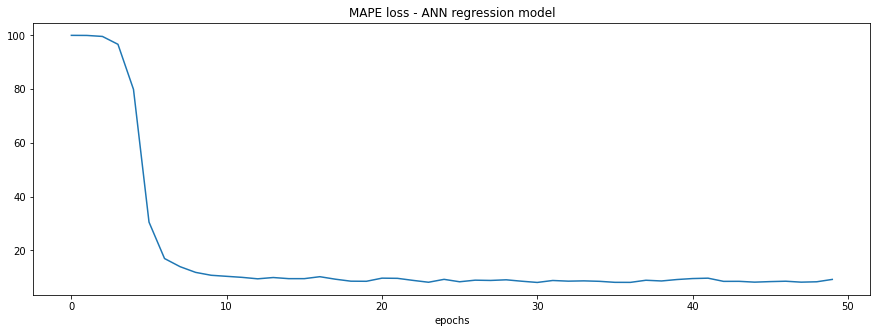

In [12]:
fig = plt.figure(figsize=(15,5))
plt.plot(avg_loss)
plt.title("MAPE loss - ANN regression model")
plt.xlabel("epochs")
plt.show()

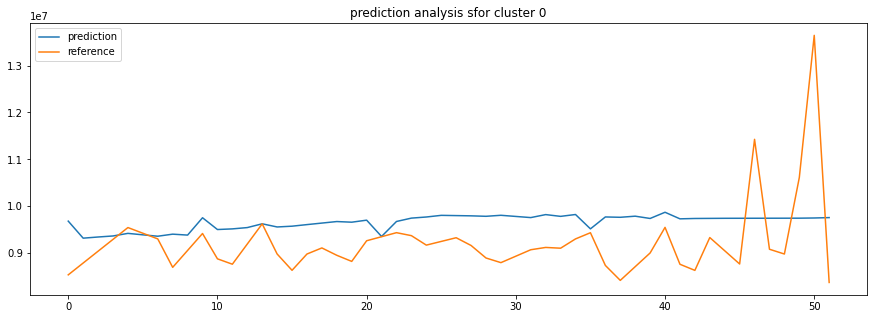

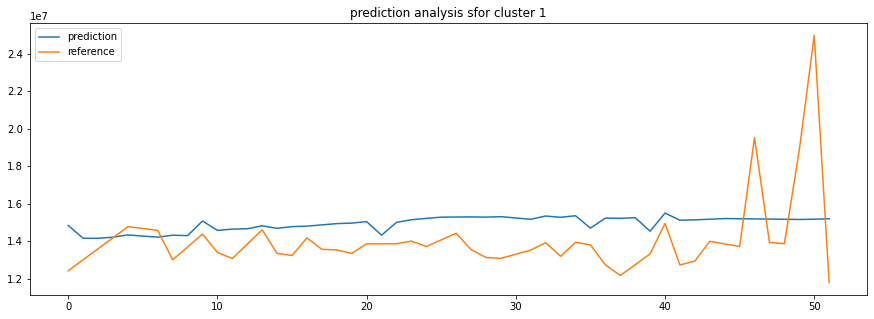

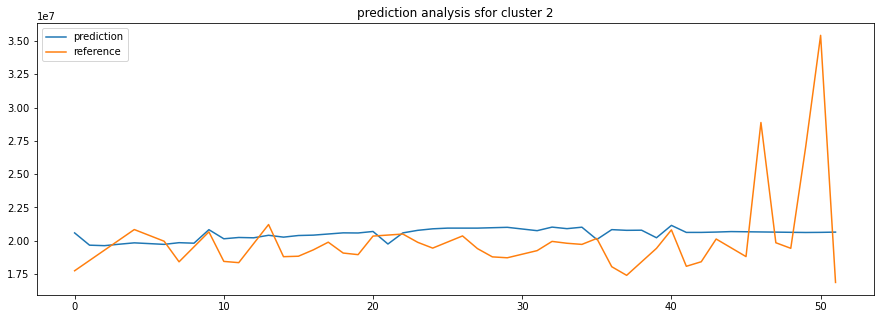

In [13]:
# wykres cen referencyjnych i predykcji
fig = plt.figure(figsize=(15,5))
plt.plot(y0_pred_test)#, marker="o", linestyle="")
plt.plot(y0_test)
plt.title("prediction analysis sfor cluster 0")
plt.legend(["prediction", "reference"])
plt.show()
fig = plt.figure(figsize=(15,5))
plt.plot(y1_pred_test)#, marker="o", linestyle="")
plt.plot(y1_test)
plt.title("prediction analysis sfor cluster 1")
plt.legend(["prediction", "reference"])
plt.show()
fig = plt.figure(figsize=(15,5))
plt.plot(y2_pred_test)#, marker="o", linestyle="")
plt.plot(y2_test)
plt.title("prediction analysis sfor cluster 2")
plt.legend(["prediction", "reference"])
plt.show()

In [14]:
y_train = (y0_train + y1_train + y2_train)/3
y_train = y_train.reshape(-1)
y_test = (y0_test + y1_test + y2_test)/3
y_test = y_test.reshape(-1)

y_pred_train = (y0_pred_train + y1_pred_train + y2_pred_train)/3
y_pred_train = y_pred_train.reshape(-1)
y_pred_test = (y0_pred_test + y1_pred_test + y2_pred_test)/3
y_pred_test = y_pred_test.reshape(-1)


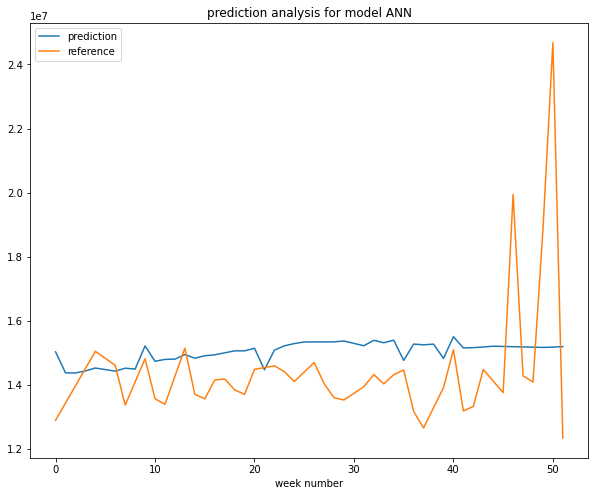

In [21]:
fig = plt.figure(figsize=(10,8))
plt.plot(y_pred_test)#, marker="o", linestyle="")
plt.plot(y_test)
plt.title("prediction analysis for model ANN")
plt.legend(["prediction", "reference"])
plt.xlabel("week number")
plt.show()

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [18]:
# # historia treningu
# fig = plt.figure(figsize=(15,5))
# plt.plot(history0.history["loss"])
# plt.title("MAPE loss for cluster 0")
# plt.xlabel("epochs")
# plt.show()
# fig = plt.figure(figsize=(15,5))
# plt.plot(history1.history["loss"])
# plt.title("MAPE loss for cluster 1")
# plt.xlabel("epochs")
# plt.show()
# fig = plt.figure(figsize=(15,5))
# plt.plot(history2.history["loss"])
# plt.title("MAPE loss for cluster 2")
# plt.xlabel("epochs")
# plt.show()

In [19]:
# # rożnice między predykcją a targetem per próbka
# y0_err = np.abs(y0_pred_test.flatten() - y0_test.flatten())
# plt.scatter(np.arange(y0_err.shape[0]), y0_err)
# plt.show()